Data before clustering



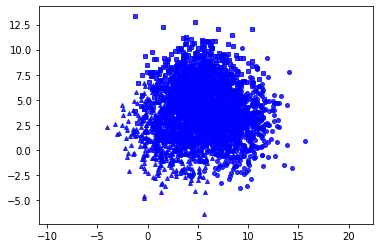

First centers
  [array([[ 1.52404422, -0.04344493],
       [ 7.95774838, 10.60138365],
       [ 3.97013141,  2.15069891]])] 

****************************************
****************************************
****************************************
****************************************
****************************************
****************************************
****************************************
****************************************
****************************************
****************************************
****************************************
****************************************
****************************************
Centers found by our algorithm:
[[2.60159548 1.72907711]
 [4.80148465 6.58005129]
 [8.31245614 2.75500539]] 

Data after clustering



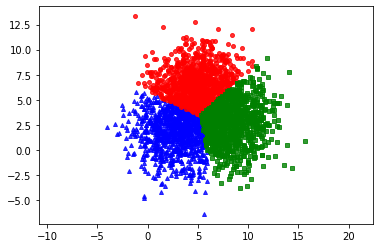

In [4]:
from __future__ import print_function 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
#Create data random
means = [[3, 2], [8, 3], [5, 6]]
cov = [[5, 0], [0, 5]]
N = 1000
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

#Dislay 3 elements of data before clustering
X=np.concatenate((X0,X1,X2)) #Default axis=0
K=3
#Create matrix with 3 value are 0,1,2, each value have N point
original_label = np.asarray([0]*N + [1]*N + [2]*N).T
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'bo', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'bs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()

def kmeans_display_after(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'gs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()   

print("Data before clustering\n")
kmeans_display(X, original_label)
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers : cdist(X,Y) return a array or matrix
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    print("First centers\n ",centers,'\n')
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K) #Use last array label to caculate new center
        if has_converged(centers[-1], new_centers): #Check value of new center and old center is equal
            break
        centers.append(new_centers)                 #Add new matrix center
        it += 1
        print('****************************************')
    return (centers, labels, it)
(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers[-1],"\n") #Last matrix in matrix centers is result
print("Data after clustering\n")
kmeans_display_after(X, labels[-1])


  
